# Appendix - Lab 3: Selection Problem

*By John Paul Bunn & Joseph Beattie*

This notebook contains a Python implementation of our algorithm, along with any code used to test it and make visualizations.

## Implementation

In [38]:
import random

def num_elements_greater(nums, item, i, j):
    num_greater = 0
    for idx in range(i, j + 1):
        if nums[idx] > item:
            num_greater += 1
    return num_greater

def divide(nums, i, j):
    pivot_pos_orig = random.randint(i, j)
    pivot = nums[pivot_pos_orig]
    
    middle = j - num_elements_greater(nums, pivot, i, j)
    nums[middle], nums[pivot_pos_orig] = nums[pivot_pos_orig], nums[middle]
    
    l = middle - 1
    r = middle + 1
    while l >= i and r <= j:
        if nums[l] <= pivot:
            l -= 1
        elif nums[r] > pivot:
            r += 1
        else:
            nums[l], nums[r] = nums[r], nums[l]
    
    return middle

def _kSmall(nums, l, r, k):
    if k <= l or k > r + 1:
        # If we get here, our code fouled in some way
        raise RuntimeError('INTERNAL: Invalid k value. ' +
                           'l = ' + str(l) + ', r = ' + str(r) + ', k = ' + str(k))
    
    # Random partition in the middle
    mid = divide(nums, l, r)
    
    # Exit condition: if the array is the correct partition size
    if mid == k - 1:
        return nums[mid]

    if mid > k - 1:
        return _kSmall(nums, l, mid - 1, k)
    
    return _kSmall(nums, mid + 1, r, k)

def kSmall(nums, k):
    if k < 1 or k > len(nums):
        raise IndexError('Invalid k value: ' + str(k))
    
    return _kSmall(nums, 0, len(nums) - 1, k)

## 4. Test Cases

Test case format: (list, k, expected, description)

In [39]:
test_cases = [
    (
        [1],
        1,
        1,
        "Single-element test"
    ),
    (
        [10, 8, 2, 4, 6],
        3,
        6,
        "5-element unsorted test"
    ),
    (
        [1, 1, 1, 1, 1],
        2,
        1,
        "5-element duplicate test"
    ),
    (
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        10,
        10,
        "10-element sorted test (last element)"
    ),
    (
        [10, 9, 8, 8, 7, 6, 5, 4, 3, 2],
        7,
        8,
        "10-element test with duplicate"
    ),
    (
        [10, 9, 8, 8, 7, 6, 5, 4, 3, 2],
        1,
        2,
        "10-element test of 1st element"
    ),
]

In [40]:
all_passed = True
for orig_list, k, expected, name in test_cases:
    list_copy = list(orig_list)
    actual = kSmall(list_copy, k)
    all_passed &= actual == expected
    if actual != expected:
        print("Case failed!")
        print(name)
        print("Expected:", expected)
        print("Actual:", actual)
        print()
print("all_passed =", all_passed)

all_passed = True


In [41]:
heading1 = 'Test Case Description'
heading2 = 'Input'
heading3 = 'Expected Output'
heading4 = 'Actual Output'

format1 = '%s'
format2 = '%s, k=%d'
format3 = '%d'
format4 = '%d'

print('|', heading1, '|', heading2, '|', heading3, '|', heading4, '|')
print('|', '---', '|', '---', '|', '---', '|', '---', '|')

for inp, k, exp_out, desc in test_cases:
    act_out = kSmall(inp, k)
    print('|', format1 % desc, '|', format2 % (inp, k), '|',
          format3 % exp_out, '|', format4 % act_out, '|')

| Test Case Description | Input | Expected Output | Actual Output |
| --- | --- | --- | --- |
| Single-element test | [1], k=1 | 1 | 1 |
| 5-element unsorted test | [2, 4, 6, 8, 10], k=3 | 6 | 6 |
| 5-element duplicate test | [1, 1, 1, 1, 1], k=2 | 1 | 1 |
| 10-element sorted test (last element) | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], k=10 | 10 | 10 |
| 10-element test with duplicate | [2, 3, 4, 5, 6, 7, 8, 8, 9, 10], k=7 | 8 | 8 |
| 10-element test of 1st element | [2, 3, 4, 5, 7, 6, 8, 8, 9, 10], k=1 | 2 | 2 |


| Test Case Description | Input | Expected Output | Actual Output |
| --- | --- | --- | --- |
| Single-element test | [1], k=1 | 1 | 1 |
| 5-element unsorted test | [2, 4, 6, 8, 10], k=3 | 6 | 6 |
| 5-element duplicate test | [1, 1, 1, 1, 1], k=2 | 1 | 1 |
| 10-element sorted test (last element) | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], k=10 | 10 | 10 |
| 10-element test with duplicate | [2, 3, 4, 5, 6, 7, 8, 8, 9, 10], k=7 | 8 | 8 |
| 10-element test of 1st element | [2, 3, 4, 5, 6, 7, 8, 8, 9, 10], k=1 | 2 | 2 |

# Benchmarking

In [42]:
import time
def benchmark(input_list, k, algorithm=kSmall, do_print=False):
    start_time = time.perf_counter()

    algorithm(input_list, k)

    end_time = time.perf_counter()
    elapsed = end_time - start_time

    if do_print:
        print("Benchmark time elapsed:", elapsed)
    return elapsed

for input_list, k, _, test_name in test_cases: 
    # Make sure all of our test cases can be successfully benchmarked
    print("\n" + test_name)
    elapsed = benchmark(input_list, k)
    print("Time elapsed:", elapsed)


Single-element test
Time elapsed: 1.650000922381878e-05

5-element unsorted test
Time elapsed: 8.500006515532732e-06

5-element duplicate test
Time elapsed: 1.0599993402138352e-05

10-element sorted test (last element)
Time elapsed: 2.5999906938523054e-06

10-element test with duplicate
Time elapsed: 1.1500000255182385e-05

10-element test of 1st element
Time elapsed: 9.2999980552122e-06


## Average Case

Performed on a randomly sampled list, where k is the midpoint of n

In [47]:
import matplotlib.pyplot as plt
import numpy as np

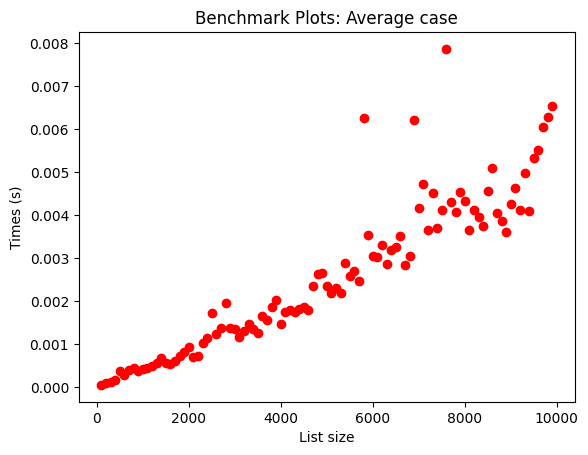

In [59]:
avg_times = []
ns = range(100, int(10e3), 100)
num_cases = 10

for n in ns:
    cases = [random.sample(range(100000), n) for _ in range(num_cases)]
    elapsed_times = [benchmark(case, k=random.randint(1,n), do_print=False) for case in cases]
    elapsed_avg_time = sum(elapsed_times) / len(elapsed_times)
    avg_times.append(elapsed_avg_time)

plt.scatter(ns, avg_times, color='red')

# Title & axis labels
plt.title("Benchmark Plots: Average case")
plt.xlabel("List size")
plt.ylabel("Times (s)")
plt.show()

## Worst case

reverse-sorted list, where k=n

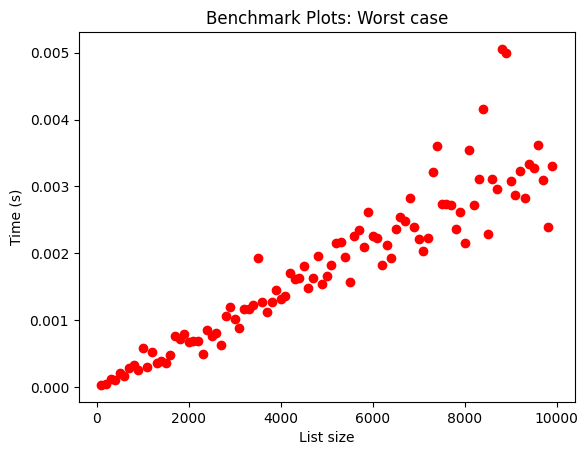

In [55]:
avg_times = []
ns = range(100, int(10e3), 100)
num_cases = 10

for n in ns:
    cases = [sorted(random.sample(range(100000), n), reverse=True) for _ in range(num_cases)]
    elapsed_times = [benchmark(case, k=n, do_print=False) for case in cases]
    elapsed_avg_time = sum(elapsed_times) / len(elapsed_times)
    avg_times.append(elapsed_avg_time)

plt.scatter(ns, avg_times, color='red')
# Title & axis labels
plt.title("Benchmark Plots: Worst case")
plt.xlabel("List size")
plt.ylabel("Time (s)")
plt.show()

## Best case

sorted list, where k is the best place to split the input list

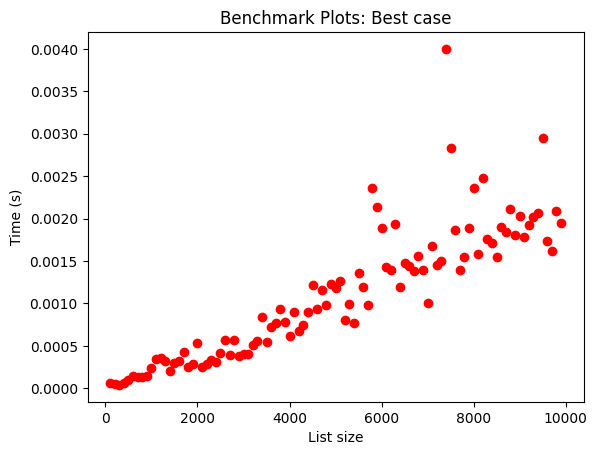

In [57]:
avg_times = []
ns = range(100, int(10e3), 100)
num_cases = 10

for n in ns:
    cases = [sorted(random.sample(range(100000), n), reverse=False) for _ in range(num_cases)]
    elapsed_times = [benchmark(case, k=n/2, do_print=False) for case in cases]
    elapsed_avg_time = sum(elapsed_times) / len(elapsed_times)
    avg_times.append(elapsed_avg_time)

plt.scatter(ns, avg_times, color='red')
# Title & axis labels
plt.title("Benchmark Plots: Best case")
plt.xlabel("List size")
plt.ylabel("Time (s)")
plt.show()